In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import os

In [28]:
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from tensorflow.keras import Sequential

In [ ]:
train_data_dir = r"\data\train"
validation_data_dir = r"\data\test"

## DATA AUGMENTATION

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Chuẩn hóa pixel ảnh về khoảng [0,1]
    rotation_range=30,         # Random xoay ảnh trong khoảng [-30°, +30°]
    shear_range=0.3,           # Áp dụng phép shear (biến dạng nghiêng) ngẫu nhiên
    zoom_range=0.3,            # Zoom in/out ảnh ngẫu nhiên trong khoảng ±30%
    horizontal_flip=True,      # Lật ngang ảnh ngẫu nhiên
    fill_mode='nearest'        # Khi xoay/lật làm mất pixel, điền pixel bị thiếu bằng giá trị gần nhất
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Tạo generator để load và augment ảnh từ thư mục train
train_generator = train_datagen.flow_from_directory(
    train_data_dir,           # Thư mục gốc chứa ảnh train, sub-folder là tên class
    color_mode='grayscale',   # Đọc ảnh ở dạng grayscale (1 kênh màu)
    target_size=(48, 48),     # Resize ảnh về 48x48 pixel
    batch_size=32,            # Mỗi batch cung cấp 32 ảnh cho model
    class_mode='categorical', # Label được one-hot encode (phân loại nhiều lớp)
    shuffle=True              # Xáo trộn ảnh để model không học theo thứ tự cố định
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__() #
print(img.shape)    # (32, 48, 48, 1) -> batch 32 ảnh grayscale 48x48
print(label.shape)  # (32, 7)         -> batch 32 nhãn one-hot cho 7 class



(32, 48, 48, 1)
(32, 7)


Angry


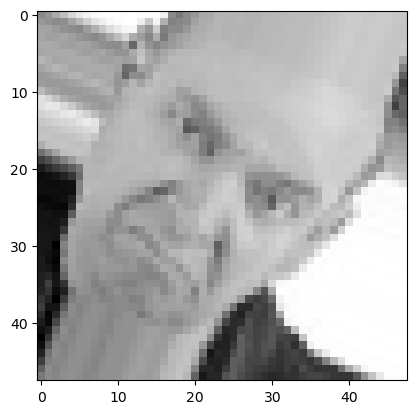

In [27]:
a=15
plt.imshow(img[a], cmap='gray')
print(class_labels[label[a].argmax()])  # In nhãn của ảnh thứ 32 trong batch (0-6 tương ứng với các class)

In [ ]:

def My_model(input_shape=(48,48,1), num_classes=7):
    """
    Xây dựng model CNN từ đầu.
    """
    inputs = Input(shape=input_shape)
    
    x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.1)(x)
    
    x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.1)(x)

    x = layers.Conv2D(256, kernel_size=(3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.1)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    myModel = models.Model(inputs=inputs, outputs=outputs, name="My_model")
    
    return myModel

# Khởi tạo model VGG16
model1 = My_model(input_shape=(48, 48, 1), num_classes=7)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model1.summary())

Model: "My_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
a = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [43]:
'''
root: đường dẫn thư mục hiện tại.
dirs: danh sách thư mục con trong root.
files: danh sách file trong root
'''
num_train_imgs = 0
for root, dirs, files in os.walk(train_data_dir):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(validation_data_dir):
    num_test_imgs += len(files)
    
print(f"Số lượng ảnh train: {num_train_imgs}")
print(f"Số lượng ảnh test: {num_test_imgs}")

Số lượng ảnh train: 28709
Số lượng ảnh test: 7178


In [ ]:
epochs=30

history = model1.fit(
    train_generator,                         #  Generator dữ liệu train (Data Augmentation)
    steps_per_epoch=num_train_imgs // 32,    #  Số bước (batch) trên mỗi epoch (chia lấy nguyên)
    epochs=epochs,                           #  Số lần lặp toàn bộ dataset
    validation_data=validation_generator,    #  Generator dữ liệu validation
    validation_steps=num_test_imgs // 32     #  Số bước validation
)

model1.save('model_file.h5')